## Homework10-0402
   **截止日期：**<font color=ff0000>**4.9(周六)晚** </font>
   <br><br>**注：**本次作业中附加题最高加分不超过1分。

## 1 NetworkX基础（10分）
- hvPlot提供了NetworkX绘制的API，感兴趣的同学可以在接下来的题目里面使用（当然也可以直接使用nx.draw()），具体可参见https://hvplot.holoviz.org/user_guide/NetworkX.html#networkx
- 若你无法正常运行nx.draw()，可尝试在本地.py文件中debug并将代码复制于此。
- 可参考NetworkX官方文档https://networkx.org/documentation/stable/tutorial.html

### 1.1 根据下图创建有向图并绘制（2分）
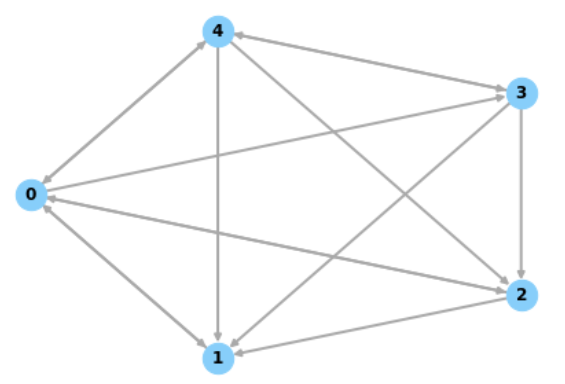

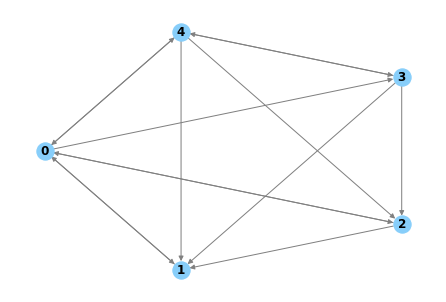

In [1]:
import networkx as nx
#TODO
G = nx.DiGraph()
elist = [(0,1),(1,0),(0,2),(2,0),(0,3),(0,4),(4,0),(4,1),(3,1),(2,1),(4,2),(3,2),(4,3),(3,4)]
G.add_edges_from(elist)
option={
    'with_labels':True,
    'node_color':'lightskyblue',
    'font_weight':'bold',
    'edge_color':'grey'
}
nx.draw_shell(G,**option)


### 1.2 添加删除操作（2分）
<br>(1)添加节点5，并添加边4->5,5->0,5->4
<br>(2)删除边4->1(可使用nx.remove_edge(u,v))
<br> 绘制得到的新网络

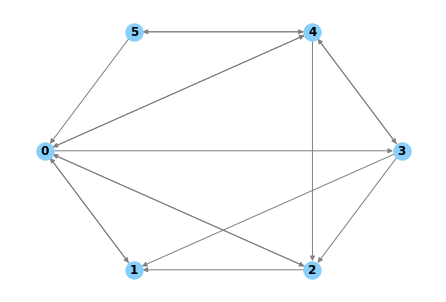

In [2]:
#TODO
G.add_node(5)
G.add_edges_from([(4,5),(5,0),(5,4)])
G.remove_edge(4,1)
nx.draw_shell(G,**option)

### 1.3 节点属性与边属性（2分）
<br>(1)为每个节点添加属性score，分别为0,1,2,3,4,5（可通过G.nodes[0]得到节点0所对应的属性词典）
<br>(2)为边添加属性weight,其值为两个端点的score的平均（可通过G[u][v]得到边(u,v)对应的属性词典）
<br>(3)输出此时网络中节点的信息（不需要与参考答案完全相同）

In [3]:
#TODO
for i in range(0,G.order()):
    G.nodes[i]['score'] = i
for (i,j) in G.edges:
    G.edges[i,j]['weight'] = (i + j) / 2

for i in range(0,G.order()):
    print('Node: {}         Attributes: {}        Edges: {}'.format(i,G.nodes[i],list(G.adjacency())[i][1]))

Node: 0         Attributes: {'score': 0}        Edges: {1: {'weight': 0.5}, 2: {'weight': 1.0}, 3: {'weight': 1.5}, 4: {'weight': 2.0}}
Node: 1         Attributes: {'score': 1}        Edges: {0: {'weight': 0.5}}
Node: 2         Attributes: {'score': 2}        Edges: {0: {'weight': 1.0}, 1: {'weight': 1.5}}
Node: 3         Attributes: {'score': 3}        Edges: {1: {'weight': 2.0}, 2: {'weight': 2.5}, 4: {'weight': 3.5}}
Node: 4         Attributes: {'score': 4}        Edges: {0: {'weight': 2.0}, 2: {'weight': 3.0}, 3: {'weight': 3.5}, 5: {'weight': 4.5}}
Node: 5         Attributes: {'score': 5}        Edges: {0: {'weight': 2.5}, 4: {'weight': 4.5}}


### 1.4 点度中心度计算（2分）
计算该网络中每个节点的点度中心度，并为每个节点添加属性centrality记录点度中心度。

In [10]:
#TODO
for n,x in nx.degree_centrality(G).items():
    G.nodes[n]['centrality'] = x
for i in range(0,G.order()):
    print('Node: {}         Attributes: {}        '.format(i,G.nodes[i]))

Node: 0         Attributes: {'score': 0, 'centrality': 1.6}        
Node: 1         Attributes: {'score': 1, 'centrality': 0.8}        
Node: 2         Attributes: {'score': 2, 'centrality': 1.0}        
Node: 3         Attributes: {'score': 3, 'centrality': 1.0}        
Node: 4         Attributes: {'score': 4, 'centrality': 1.4000000000000001}        
Node: 5         Attributes: {'score': 5, 'centrality': 0.6000000000000001}        


### 1.5 绘制图像（2分+0.5分）
用你认为合理且美观的方式绘制该网络：
<br>(1)基础要求：可修改节点颜色、大小、形状，边的颜色、粗细等(2分)
<br>(2)(附加题0.5分，若完成优秀可加1分)
<br>&emsp;可选方案1：根据每个节点centrality或每条边weight的大小，绘制不同样式的节点或边；
<br>&emsp;可选方案2：合理排布节点位置；
<br>&emsp;其他你能想到的方案

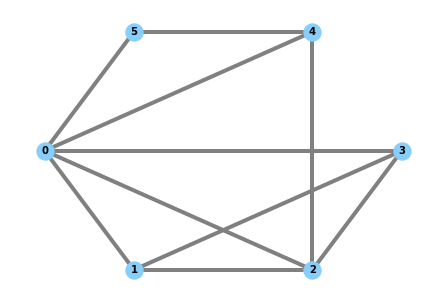

In [28]:
#TODO
G = nx.Graph()
elist = [(0,1),(0,2),(0,3),(0,4),(0,5),(1,3),(1,2),(2,3),(2,4),(4,5)]
G.add_edges_from(elist)
option={
    'with_labels':True,
    'node_color':'lightskyblue',
    'node_shape':'o',
    'font_size':10,
    'font_color':'black',
    'font_weight':'bold',
    'edge_color':'grey',
    'width':4.0,
}
nx.draw_shell(G,**option)

## 2 附加题
本次附加题最多加1分
### 朋友悖论（1分）
朋友悖论最早是由社会学家斯科特·L·菲尔德（Scott L. Feld）于1991年首次观察到的一种现象，即平均而言你的朋友比你拥有更多的朋友。这个悖论实际上表明了中心度的重要性：你更容易认识拥有更多朋友的人。下面我们考虑一个极端的例子来模拟这个悖论。
<br>(1)读取friends.csv，将文件中的朋友关系以网络的方式建模。
<br>(2)统计每个人朋友的数量，以及朋友的平均朋友数，作为节点属性添加。
<br>(3)统计满足朋友悖论的人的百分比。
<br>(4)以不同颜色绘制满足/不满足朋友悖论的节点。

96


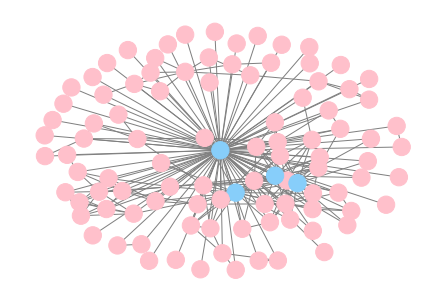

In [80]:
#TODO
import pandas as pd
data = pd.read_csv('friends.csv')
G = nx.Graph()
elist = list(zip(data.loc[:,'person1'],data.loc[:,'person2']))
G.add_edges_from(elist)

ls = []
color_map = []
for i in range(0,len(G.nodes())):
    G.nodes[i]['f_number'] =int(G.degree(i))
    G.nodes[i]['ff_number'] = 0
for i in range(0,len(G.nodes())):
    for j in G[i].keys():
        G.nodes[i]['ff_number'] += G.nodes[j]['f_number']
    G.nodes[i]['ff_number'] /= G.nodes[i]['f_number']
    if G.nodes[i]['ff_number'] > G.nodes[i]['f_number']:
        color_map.append('pink')
        ls.append(i)
    else:
        color_map.append('lightskyblue')

nx.draw(G,node_color = color_map,edge_color='grey')
print(len(ls))


### Unpopular Norms(1分)
在非完全的社交网络中，由于中心度较高的节点对周围节点的影响，可能会使一些小众爱好逐渐演变为大众爱好，或是形成不受欢迎的规范，可参考https://www.jasss.org/20/3/5.html
<br>下面我们以一个很简单的例子来模拟这种现象。
<br>(1)将给定的朋友关系建模成无向图。
<br>(2)为网络中的节点加上给定的标签与朋友数量。
<br>(3)绘制网络，不同标签采用不同颜色（可选：不同朋友数量采用不同大小）
<br>(4)用以下规则更新网络：一个人的标签由其朋友的标签加权决定，权重为朋友数量。
<br>(5)重复(3)-(4)直到网络不再变化。

In [ ]:
import numpy as np
edges=[
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]]
labels=[0,1,0,1,0,0,0,0,1,0,0,1]
#TODO
